In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ungrouped Frequency

In [2]:
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.shape

(398, 9)

In [8]:
df['origin'].value_counts()   # counting the number of times each distinct value has appeared

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [10]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [14]:
cylinders = df['cylinders'].value_counts()

<Axes: xlabel='cylinders'>

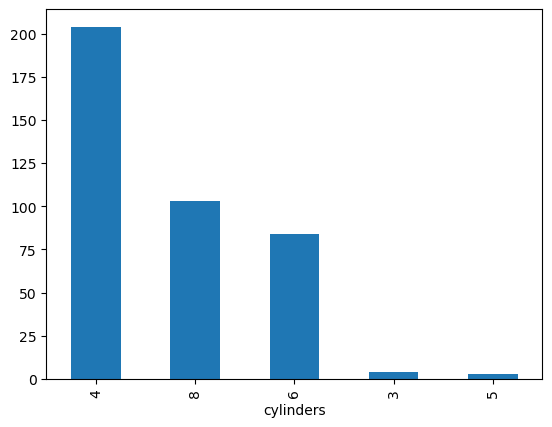

In [18]:
cylinders.plot(kind = 'bar')

In [19]:
origin = df['origin'].value_counts()

<Axes: xlabel='origin'>

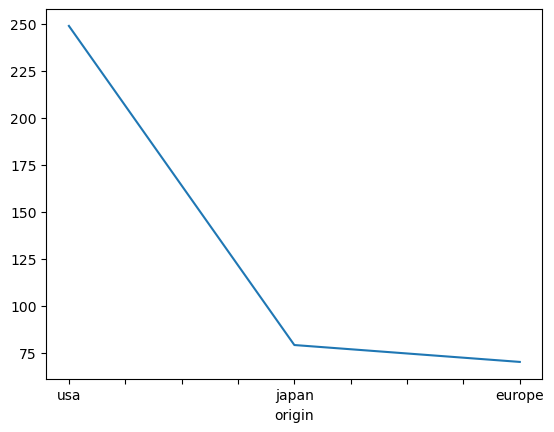

In [24]:
origin.plot() # if kind is not supplied, draws a line plot

<Axes: ylabel='origin'>

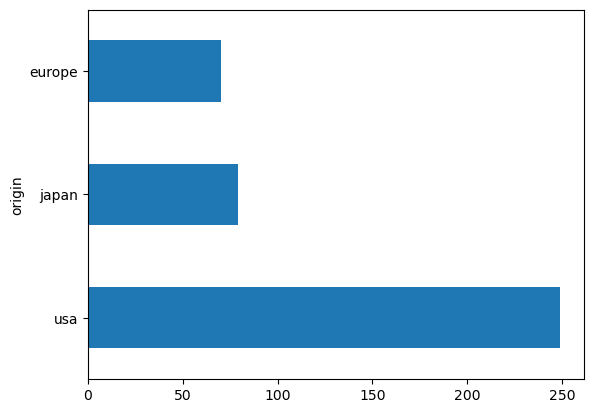

In [25]:
origin.plot(kind = 'barh') # 'barh' is for horizontal bar plots 

In [29]:
pd.crosstab(df['origin'], '  Number of Cars') # both argument needed. cross-tabulates df['origin'] and its counts

col_0,Number of Cars
origin,
europe,70
japan,79
usa,249


In [28]:
pd.crosstab(df['cylinders'], ' Number of Cars')

col_0,Number of Cars
cylinders,
3,4
4,204
5,3
6,84
8,103


In [31]:
frame = pd.crosstab(df['cylinders'], ' Number of Cars')

<Axes: xlabel='cylinders'>

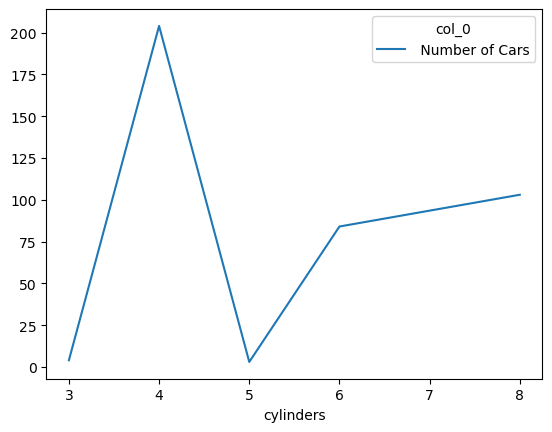

In [34]:
frame.plot()

<Axes: xlabel='cylinders'>

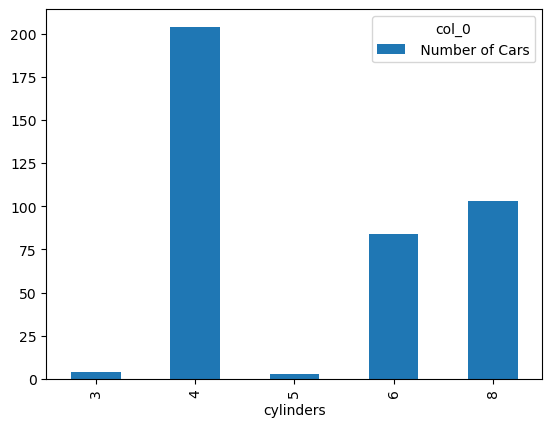

In [35]:
frame.plot(kind = 'bar')

# Relative Frequencies

In [36]:
cars_in_country = pd.crosstab(df["origin"],  "Number of cars")
type(cars_in_country)

pandas.core.frame.DataFrame

In [38]:
cars_in_country

col_0,Number of cars
origin,
europe,70
japan,79
usa,249


In [42]:
cars_in_country["relative frequencies"]=  cars_in_country["Number of cars"]/sum(cars_in_country["Number of cars"])


In [57]:
cars_in_country['percentage frequencies'] = cars_in_country['relative frequencies'] * 100

In [58]:
cars_in_country

col_0,Number of cars,relative frequency,relative frequencies,percentage frequencies
origin,,,,
europe,70,0.175879,0.175879,17.587940
japan,79,0.198492,0.198492,19.849246
usa,249,0.625628,0.625628,62.562814


<Axes: ylabel='relative frequencies'>

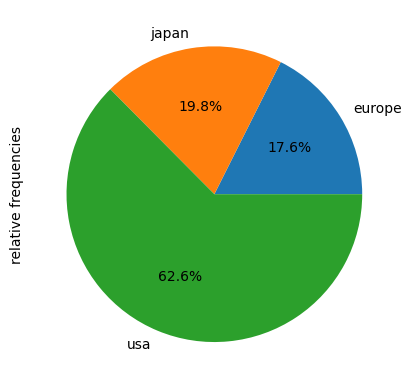

In [60]:
cars_in_country['relative frequencies'].plot( kind = 'pie', autopct='%1.1f%%')

# Grouped Frequencies

In [77]:
df['displacement'].value_counts(bins = 5) # without bins, it will just give ungrouped frequency, giving it bins gives grouped frequency

displacement
(67.612, 145.4]    196
(300.2, 377.6]      73
(222.8, 300.2]      60
(145.4, 222.8]      44
(377.6, 455.0]      25
Name: count, dtype: int64

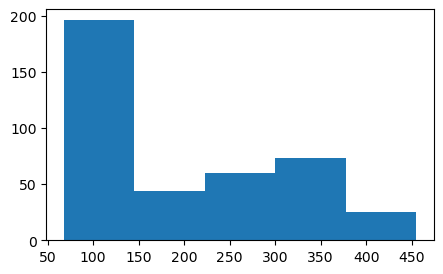

In [67]:
plt.figure(figsize = (5, 3))
plt.hist(df["displacement"],bins = 5)
plt.show()

In [81]:
sorted_group_frequency = df["horsepower"].value_counts( bins=5, sort = False) # sort = false means bars are not sorted in descending order


In [75]:
type(sorted_group_frequency)

pandas.core.series.Series

(array([122., 164.,  66.,  27.,  13.]),
 array([ 46. ,  82.8, 119.6, 156.4, 193.2, 230. ]),
 <BarContainer object of 5 artists>)

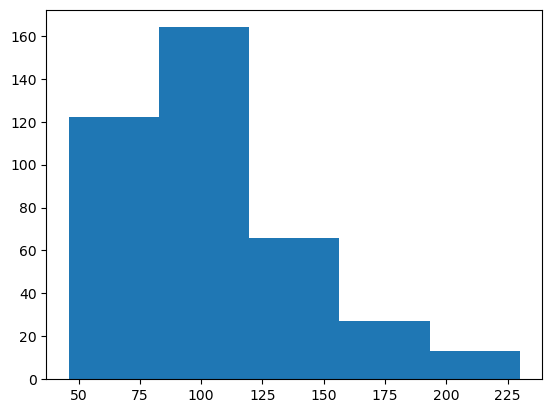

In [84]:
plt.hist(df["horsepower"], bins =5)

In [90]:
grouped_weight_frequency = df['weight'].value_counts(bins = 10, sort = False)

<Axes: ylabel='weight'>

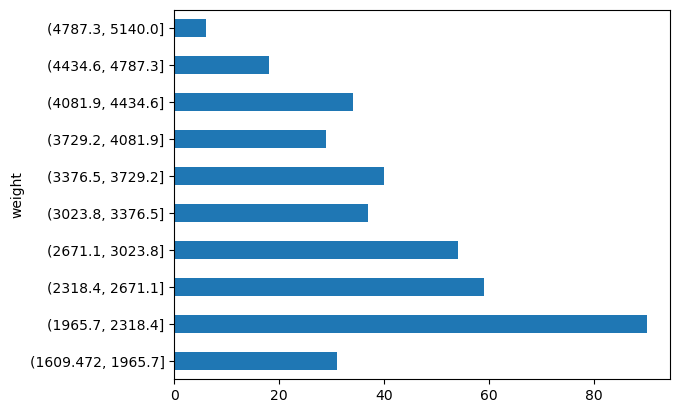

In [94]:
grouped_weight_frequency.plot(kind = 'barh')

In [96]:
df[(df['weight'] >= 4434.6) & (df['weight'] <= 4787.3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
39,14.0,8,400.0,175.0,4464,11.5,71,usa,pontiac catalina brougham
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw)
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
68,13.0,8,350.0,155.0,4502,13.5,72,usa,buick lesabre custom
69,12.0,8,350.0,160.0,4456,13.5,72,usa,oldsmobile delta 88 royale
91,13.0,8,400.0,150.0,4464,12.0,73,usa,chevrolet caprice classic
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
105,13.0,8,360.0,170.0,4654,13.0,73,usa,plymouth custom suburb


In [105]:
df.sort_values('weight')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
54,35.0,4,72.0,69.0,1613,18.0,71,japan,datsun 1200
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona
343,39.1,4,79.0,58.0,1755,16.9,81,japan,toyota starlet
345,35.1,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala


<Axes: ylabel='weight'>

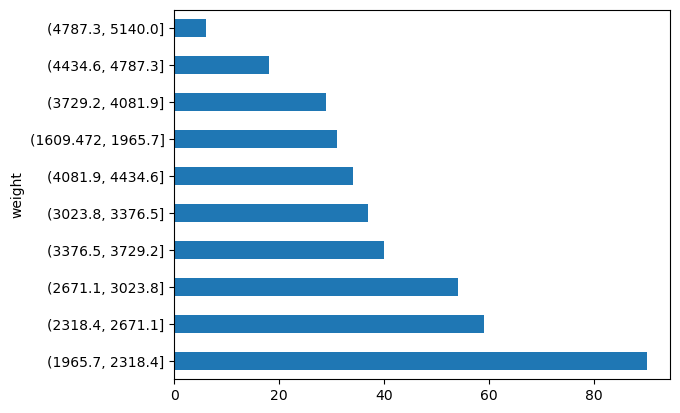

In [106]:
df['weight'].value_counts(bins = 10).plot(kind = 'barh')